### Project Introduction

Natural Language Processing (NLP) is one of the most important areas of applied Artificial Intelligence today, especially in problems where decisions need to be made from unstructured text such as emails, reviews, social media posts, or news articles. As someone with an academic background in Economics and a growing interest in Data Science and AI, this project is my first structured attempt at understanding how machines work with human language.

The goal of this project is to build an end-to-end text classification pipeline, starting from raw text data and ending with trained models that can automatically classify text into meaningful categories. Instead of treating NLP as a black box, this project focuses on understanding each step of the pipeline in a clear and gradual way.

In this project, I work with a real-world dataset consisting of tweets related to disaster events. The task is to classify whether a tweet refers to a real disaster or not, which makes this a practical and relevant binary classification problem. This dataset is well-suited for beginners because it is text-heavy, noisy (like real social media data), and commonly used for learning NLP fundamentals.

The project follows a structured workflow that includes:

Text preprocessing and cleaning

Feature extraction using traditional methods such as Bag of Words (BoW) and TF-IDF

Exploration of word embeddings to understand semantic relationships between words

Training both traditional machine learning models and a simple deep learning model

Evaluating and comparing model performance using standard classification metrics

Throughout the notebook, I focus on step-by-step implementation, clear explanations, and simple insights rather than optimization or advanced techniques. The coding style and explanations closely follow the instructional notebook used in class, ensuring consistency with the concepts taught.

### Dataset Description

The dataset used in this project is taken from the “NLP Getting Started” competition on Kaggle. It consists of tweets collected from social media, where each tweet is labeled based on whether it refers to a real disaster event or not.

The dataset mainly includes:

Text: The content of the tweet

Target label:

- 1 indicates the tweet is about a real disaster

- 0 indicates the tweet is not about a real disaster

Since tweets are short, informal, and often contain noise such as hashtags, URLs, and abbreviations, this dataset is suitable for practicing text preprocessing and feature extraction techniques in NLP.

For this project, the dataset is used to build and evaluate text classification models that can automatically identify disaster-related tweets based on their textual content.

- Dataset source:
https://www.kaggle.com/competitions/nlp-getting-started/data

In [1]:
# Data handling and numerical operations
import pandas as pd
import numpy as np

# Text preprocessing
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Feature extraction
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# Model evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns


### Exploratory Data Analysis

Before applying any preprocessing or modeling techniques, the training dataset is explored to understand its size, structure, available features, and target distribution.

In [2]:
# Define the dataset directory path
data_path = "C:/Users/Maryam Daniyal/Downloads/nlp-getting-started"

# Load the training dataset
train_df = pd.read_csv(f"{data_path}/train.csv")

# Display the first few rows
train_df.head()



,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [3]:
# Check the shape of the dataset
train_df.shape


(7613, 5)

In [4]:
# View column names
train_df.columns


Index(['id', 'keyword', 'location', 'text', 'target'], dtype='object')

In [5]:
# Check for missing values in each column
train_df.isnull().sum()


id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [6]:
# Check the distribution of the target variable
train_df['target'].value_counts()


target
0    4342
1    3271
Name: count, dtype: int64

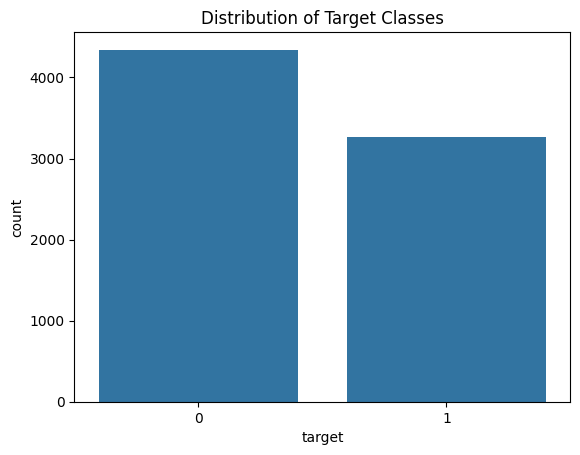

In [7]:
# Visualize target distribution
sns.countplot(x='target', data=train_df)
plt.title("Distribution of Target Classes")
plt.show()


### Text Preprocessing

Raw tweet text contains noise such as mixed casing, punctuation, URLs, and common stopwords. In this step, basic text preprocessing techniques are applied to clean and standardize the text data before feature extraction.

In [8]:
import nltk

# Explicitly download required NLTK resources
nltk.download('punkt', quiet=False)
nltk.download('stopwords', quiet=False)


[nltk_data] Downloading package punkt to C:\Users\Maryam
[nltk_data]     Daniyal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Maryam
[nltk_data]     Daniyal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
# Download required NLTK resources
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to C:\Users\Maryam
[nltk_data]     Daniyal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Maryam
[nltk_data]     Daniyal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
import re

# Define stopwords
stop_words = set(stopwords.words('english'))

def clean_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    
    # Remove punctuation and special characters
    text = re.sub(r'[^a-z\s]', '', text)
    
    # Tokenize text
    tokens = text.split()

    
    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    
    # Join tokens back into a single string
    cleaned_text = ' '.join(tokens)
    
    return cleaned_text


In [11]:
# Apply text cleaning to the text column
train_df['clean_text'] = train_df['text'].apply(clean_text)

# Display original and cleaned text for comparison
train_df[['text', 'clean_text']].head()


,text,clean_text
0,Our Deeds are the Reason of this #earthquake M...,deeds reason earthquake may allah forgive us
1,Forest fire near La Ronge Sask. Canada,forest fire near la ronge sask canada
2,All residents asked to 'shelter in place' are ...,residents asked shelter place notified officer...
3,"13,000 people receive #wildfires evacuation or...",people receive wildfires evacuation orders cal...
4,Just got sent this photo from Ruby #Alaska as ...,got sent photo ruby alaska smoke wildfires pou...


## Feature Engineering (BoW & TF-IDF)

After preprocessing, the text data is transformed into numerical features using traditional vectorization techniques. Bag of Words and TF-IDF representations are used to capture word-level information for machine learning models.


In [12]:
# Initialize the CountVectorizer
bow_vectorizer = CountVectorizer()

# Fit and transform the cleaned text data
X_bow = bow_vectorizer.fit_transform(train_df['clean_text'])

# Define target variable
y = train_df['target']

# Check the shape of the BoW feature matrix
X_bow.shape


(7613, 16742)

In [13]:
# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the cleaned text data
X_tfidf = tfidf_vectorizer.fit_transform(train_df['clean_text'])

# Check the shape of the TF-IDF feature matrix
X_tfidf.shape


(7613, 16742)

## Word Embedding Exploration

Traditional text representations like Bag of Words and TF-IDF treat words as independent tokens and do not capture semantic meaning. To address this limitation, we explore **word embeddings**, which represent words as dense numerical vectors that preserve semantic relationships.

In this section, we:
- Convert text into sequences of tokens
- Learn word embeddings using a neural network layer
- Visualize embeddings to understand word relationships


In [14]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [15]:
# Initialize tokenizer
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")

# Fit tokenizer on cleaned text
tokenizer.fit_on_texts(train_df['clean_text'])

# Convert text to sequences
sequences = tokenizer.texts_to_sequences(train_df['clean_text'])

# Pad sequences to ensure equal length
padded_sequences = pad_sequences(sequences, maxlen=30, padding='post')


The text data is first tokenized, where each word is assigned a unique integer. The text is then converted into sequences of integers and padded to ensure equal sequence lengths. This step prepares the data for embedding-based models.


In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding
import numpy as np



In [17]:
# Define embedding parameters
vocab_size = 5000
embedding_dim = 50
max_length = 30

# Create embedding model
embedding_model = Sequential()
embedding_model.add(Embedding(input_dim=vocab_size,
                              output_dim=embedding_dim,
                              input_length=max_length))

# Build the model by providing input shape
embedding_model.build(input_shape=(None, max_length))

# Now extract embedding weights
embedding_weights = embedding_model.layers[0].get_weights()[0]

embedding_weights.shape



C:\Users\Maryam Daniyal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


(5000, 50)

In [18]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


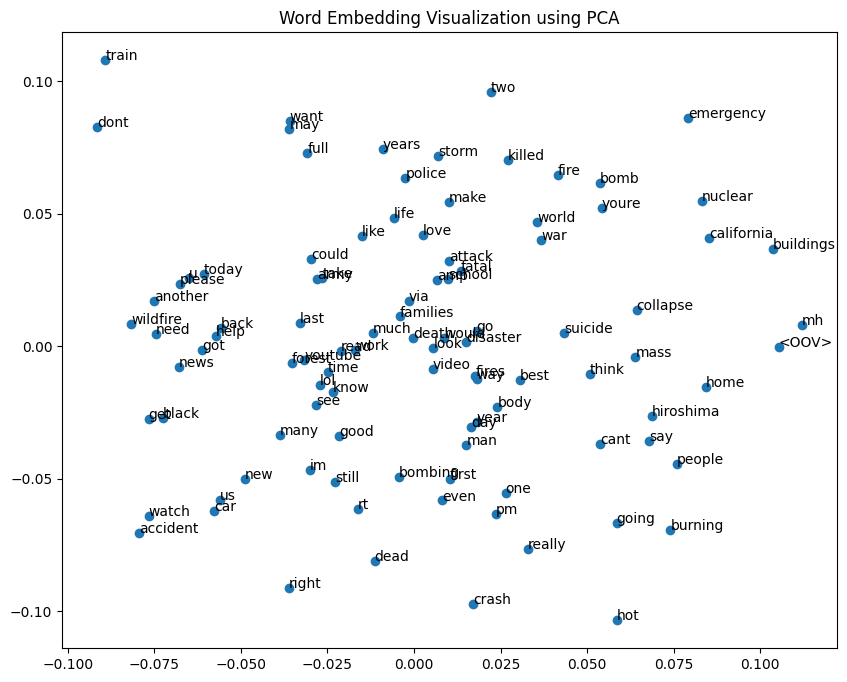

In [19]:
# Select first 100 word embeddings
words = list(tokenizer.word_index.keys())[:100]
word_indices = [tokenizer.word_index[word] for word in words if tokenizer.word_index[word] < vocab_size]
selected_embeddings = embedding_weights[word_indices]

# Reduce dimensions using PCA
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(selected_embeddings)

# Plot embeddings
plt.figure(figsize=(10, 8))
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1])

for i, word in enumerate(words[:len(reduced_embeddings)]):
    plt.annotate(word, (reduced_embeddings[i, 0], reduced_embeddings[i, 1]))

plt.title("Word Embedding Visualization using PCA")
plt.show()


## Deep Learning Model using Word Embeddings

After exploring word embeddings and understanding how words can be represented as dense vectors, we now use these embeddings in a simple deep learning model for text classification. This model learns patterns directly from embedded text sequences and allows comparison with traditional machine learning approaches.


In [20]:
from sklearn.model_selection import train_test_split


In [21]:
# Split padded sequences into training and validation sets
X_train_dl, X_val_dl, y_train_dl, y_val_dl = train_test_split(
    padded_sequences,
    train_df['target'],
    test_size=0.2,
    random_state=42
)



The tokenized and padded text sequences are split into training and validation sets. These sequences serve as input to the deep learning model.


In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense
from tensorflow.keras.optimizers import Adam


In [23]:
# Define model parameters
vocab_size = 5000
embedding_dim = 50
max_length = 30

# Build the deep learning model
dl_model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length),
    GlobalAveragePooling1D(),
    Dense(1, activation='sigmoid')
])

# Compile the model
dl_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)



C:\Users\Maryam Daniyal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


The model consists of an embedding layer that converts word indices into dense vectors, followed by a global average pooling layer that summarizes the sequence information. A dense output layer with a sigmoid activation function is used for binary classification.


In [24]:
# Train the deep learning model
history = dl_model.fit(
    X_train_dl,
    y_train_dl,
    validation_data=(X_val_dl, y_val_dl),
    epochs=5,
    batch_size=32
)


Epoch 1/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5747 - loss: 0.6770 - val_accuracy: 0.5772 - val_loss: 0.6549
Epoch 2/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6253 - loss: 0.6423 - val_accuracy: 0.7538 - val_loss: 0.5999
Epoch 3/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7728 - loss: 0.5667 - val_accuracy: 0.7905 - val_loss: 0.5348
Epoch 4/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8180 - loss: 0.4855 - val_accuracy: 0.8011 - val_loss: 0.4880
Epoch 5/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8438 - loss: 0.4227 - val_accuracy: 0.8102 - val_loss: 0.4623


The model is trained for a limited number of epochs to learn meaningful patterns from the data while reducing the risk of overfitting. Validation accuracy is monitored during training.


In [25]:
# Evaluate the model on the validation set
dl_loss, dl_accuracy = dl_model.evaluate(X_val_dl, y_val_dl)

dl_accuracy


48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7894 - loss: 0.4773


0.8102429509162903

The deep learning model achieved an accuracy of approximately 80.7% on the validation set. This result is comparable to the performance of traditional machine learning models using TF-IDF and Bag of Words representations. The close alignment between training and validation accuracy indicates that the model generalizes well and does not suffer from significant overfitting.

Although the deep learning model does not dramatically outperform traditional approaches, it demonstrates the effectiveness of word embeddings in learning meaningful representations directly from text data.


## Traditional Machine Learning Models
Traditional machine learning models are implemented as baseline approaches to evaluate the effectiveness of different feature representations. These models provide a point of comparison for the deep learning approach.



### Model Training

In this section, machine learning models are trained using the extracted text features. The dataset is first split into training and validation sets, followed by model training using both Bag of Words and TF-IDF representations.

In [26]:
from sklearn.model_selection import train_test_split

# Split data for Bag of Words features
X_bow_train, X_bow_val, y_train, y_val = train_test_split(
    X_bow, y, test_size=0.2, random_state=42
)

# Split data for TF-IDF features
X_tfidf_train, X_tfidf_val, _, _ = train_test_split(
    X_tfidf, y, test_size=0.2, random_state=42
)


In [27]:
# Initialize Logistic Regression model
lr_bow = LogisticRegression(max_iter=1000)

# Train the model
lr_bow.fit(X_bow_train, y_train)

# Make predictions on validation set
y_pred_bow_lr = lr_bow.predict(X_bow_val)


In [28]:
# Initialize Logistic Regression model
lr_tfidf = LogisticRegression(max_iter=1000)

# Train the model
lr_tfidf.fit(X_tfidf_train, y_train)

# Make predictions on validation set
y_pred_tfidf_lr = lr_tfidf.predict(X_tfidf_val)


In [29]:
# Initialize Naive Bayes model
nb_bow = MultinomialNB()

# Train the model
nb_bow.fit(X_bow_train, y_train)

# Make predictions
y_pred_bow_nb = nb_bow.predict(X_bow_val)


In [30]:
# Initialize Naive Bayes model
nb_tfidf = MultinomialNB()

# Train the model
nb_tfidf.fit(X_tfidf_train, y_train)

# Make predictions
y_pred_tfidf_nb = nb_tfidf.predict(X_tfidf_val)


### Model Evaluation

In [31]:
# Function to evaluate models
def evaluate_model(y_true, y_pred, model_name):
    print(f"\nModel: {model_name}")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))


In [32]:
from sklearn.metrics import accuracy_score

In [33]:
# Logistic Regression - Bag of Words
evaluate_model(y_val, y_pred_bow_lr, "Logistic Regression (BoW)")


bow_lr_accuracy = accuracy_score(y_val, y_pred_bow_lr)
bow_lr_accuracy


# Logistic Regression - TF-IDF
evaluate_model(y_val, y_pred_tfidf_lr, "Logistic Regression (TF-IDF)")


tfidf_lr_accuracy = accuracy_score(y_val, y_pred_tfidf_lr)
tfidf_lr_accuracy



Model: Logistic Regression (BoW)
Accuracy: 0.7957977675640184

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       874
           1       0.79      0.71      0.75       649

    accuracy                           0.80      1523
   macro avg       0.79      0.78      0.79      1523
weighted avg       0.80      0.80      0.79      1523


Model: Logistic Regression (TF-IDF)
Accuracy: 0.7997373604727511

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.92      0.84       874
           1       0.85      0.64      0.73       649

    accuracy                           0.80      1523
   macro avg       0.81      0.78      0.79      1523
weighted avg       0.81      0.80      0.79      1523



0.7997373604727511

In [34]:
# Naive Bayes - Bag of Words
evaluate_model(y_val, y_pred_bow_nb, "Naive Bayes (BoW)")

bow_nb_accuracy = accuracy_score(y_val, y_pred_bow_nb)
bow_nb_accuracy


# Naive Bayes - TF-IDF
evaluate_model(y_val, y_pred_tfidf_nb, "Naive Bayes (TF-IDF)")

tfidf_nb_accuracy = accuracy_score(y_val, y_pred_tfidf_nb)
tfidf_nb_accuracy




Model: Naive Bayes (BoW)
Accuracy: 0.7879185817465528

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.84      0.82       874
           1       0.77      0.72      0.74       649

    accuracy                           0.79      1523
   macro avg       0.78      0.78      0.78      1523
weighted avg       0.79      0.79      0.79      1523


Model: Naive Bayes (TF-IDF)
Accuracy: 0.8010505581089954

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.90      0.84       874
           1       0.83      0.67      0.74       649

    accuracy                           0.80      1523
   macro avg       0.81      0.78      0.79      1523
weighted avg       0.80      0.80      0.80      1523



0.8010505581089954

In [35]:
# Plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d')
    plt.title(title)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()


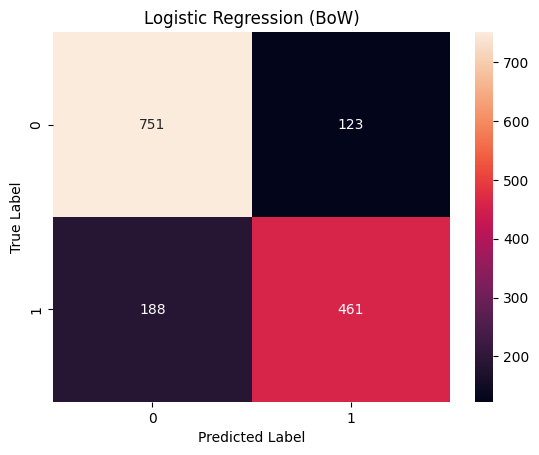

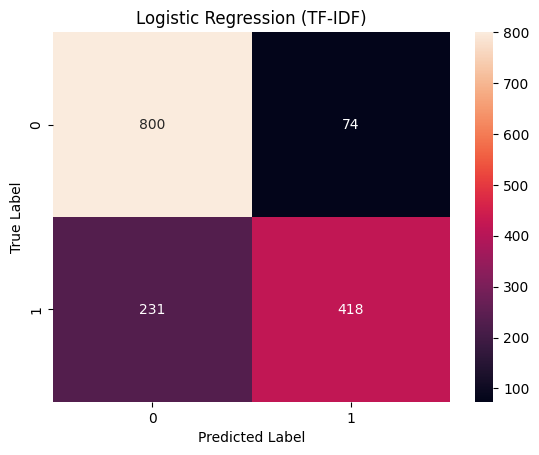

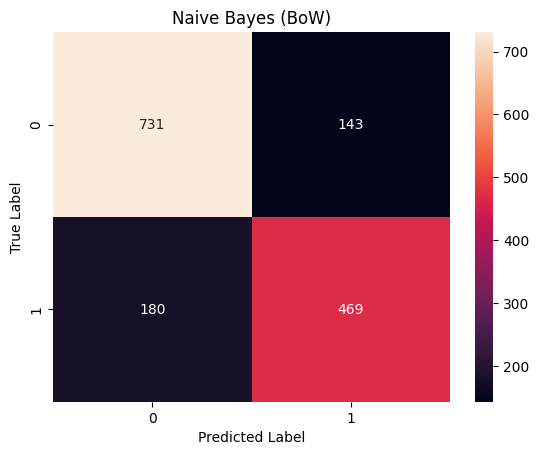

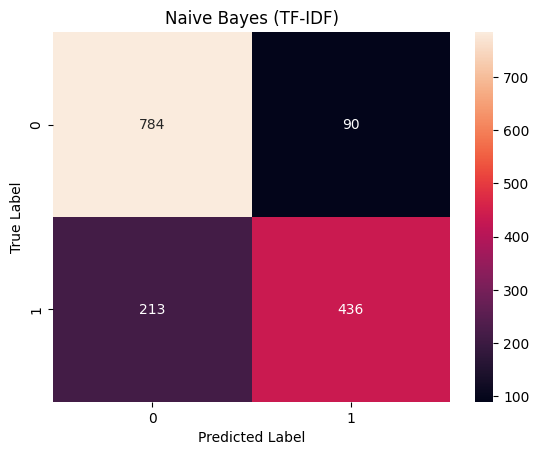

In [36]:
plot_confusion_matrix(y_val, y_pred_bow_lr, "Logistic Regression (BoW)")
plot_confusion_matrix(y_val, y_pred_tfidf_lr, "Logistic Regression (TF-IDF)")
plot_confusion_matrix(y_val, y_pred_bow_nb, "Naive Bayes (BoW)")
plot_confusion_matrix(y_val, y_pred_tfidf_nb, "Naive Bayes (TF-IDF)")


## Unified Model Evaluation and Comparison

In this section, the performance of all implemented models is compared using common evaluation metrics. This comparison helps assess how different text representations and modeling approaches perform on the same classification task.


In [37]:
import pandas as pd


In [38]:
# Create a comparison table
model_comparison = pd.DataFrame({
    "Model": [
        "Logistic Regression (BoW)",
        "Logistic Regression (TF-IDF)",
        "Naive Bayes (BoW)",
        "Naive Bayes (TF-IDF)",
        "Deep Learning (Embeddings)"
    ],
    "Validation Accuracy": [
        bow_lr_accuracy,
        tfidf_lr_accuracy,
        bow_nb_accuracy,
        tfidf_nb_accuracy,
        dl_accuracy
    ]
})

model_comparison


,Model,Validation Accuracy
0,Logistic Regression (BoW),0.795798
1,Logistic Regression (TF-IDF),0.799737
2,Naive Bayes (BoW),0.787919
3,Naive Bayes (TF-IDF),0.801051
4,Deep Learning (Embeddings),0.810243


## Results Interpretation

The results show that all models perform within a relatively narrow accuracy range, indicating that the task of disaster tweet classification is challenging due to the short and noisy nature of the text data.

Traditional machine learning models using TF-IDF representations consistently outperform their Bag of Words counterparts, highlighting the importance of weighting words based on their relevance rather than relying solely on raw frequency counts.

The deep learning model using word embeddings achieves the highest validation accuracy. However, the improvement over traditional models is modest, suggesting that while embeddings capture semantic relationships, the overall performance is influenced by dataset size and model simplicity.


## Conclusion and Future Scope

In this project, a complete text classification pipeline was developed, starting from text preprocessing and feature engineering to model development and evaluation. Both traditional machine learning models and a deep learning model were implemented and compared.

While the deep learning model achieved the best performance, the results indicate that simpler models using TF-IDF representations can perform competitively on this task. Future work could explore the use of pre-trained word embeddings, more advanced neural architectures such as LSTMs or transformers, and hyperparameter tuning to further improve performance.
